<a href="https://colab.research.google.com/github/mvgarcia/GarciaValentina_RECV_Entrega3/blob/main/GarciaValentina_RECV_Entrega3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# --- Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Split train/test
from sklearn.model_selection import train_test_split
#Model
from sklearn.neural_network import MLPClassifier
#Accuracy
from sklearn.metrics import accuracy_score

In [40]:
#--- Read data

data = pd.read_csv("/content/sample_data/iris.data",names=['sepal_length','sepal_width','petal_length','petal_width','class'])

print(data.head())

SL = data["sepal_length"]
SW = data["sepal_width"]
PL = data["petal_length"]
PW = data["petal_width"]
C = data["class"]

#--- Turn into binary problem

#--- Mask
setosa = C == 'Iris-setosa'
other = C != 'Iris-setosa'

C[setosa] = 1
C[other] = 0

print(data.head())

np.unique(C)

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
   sepal_length  sepal_width  petal_length  petal_width class
0           5.1          3.5           1.4          0.2     1
1           4.9          3.0           1.4          0.2     1
2           4.7          3.2           1.3          0.2     1
3           4.6          3.1           1.5          0.2     1
4           5.0          3.6           1.4          0.2     1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([0, 1], dtype=object)

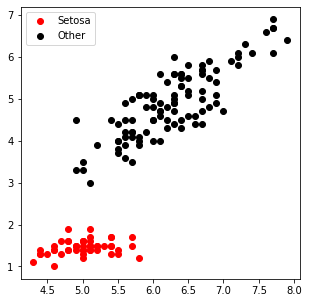

In [43]:
#--- Plot input data
fig = plt.figure(figsize=(5,5))
plt.plot(SL[setosa],PL[setosa],'ro',label='Setosa')
plt.plot(SL[other],PL[other],'ko',label='Other')
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.legend()

Se ve fácilmente separable mediante una recta

In [49]:
#--- Functions

#La que quiero hallar
def y(x):
 return -(b + w_1*x)/w_2

#Activation function
def act(z):
  return 1/(1 + np.exp(-z))

Epoch: [1/15], bias: -0.5, w1:-3.5, w2:-2.35


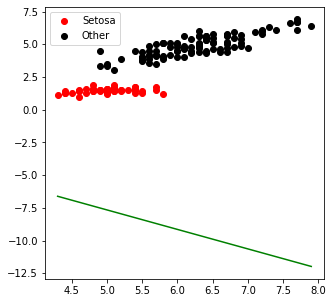

Epoch: [2/15], bias: 0.0, w1:-2.0, w2:-3.3000000000000003


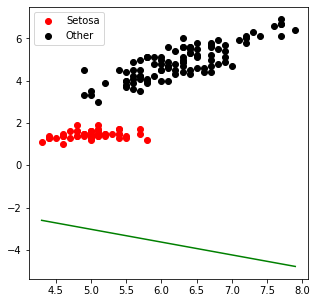

Epoch: [3/15], bias: 0.5, w1:-0.5, w2:-4.250000000000001


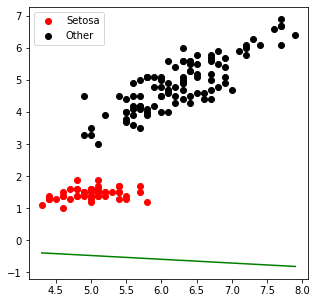

Epoch: [4/15], bias: 0.5, w1:-0.8000000000000003, w2:-5.300000000000001


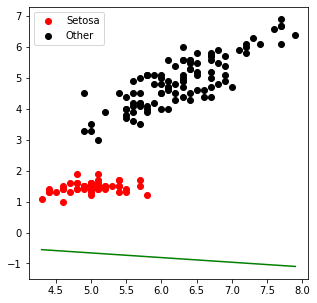

Epoch: [5/15], bias: 1.0, w1:1.7499999999999996, w2:-4.6000000000000005


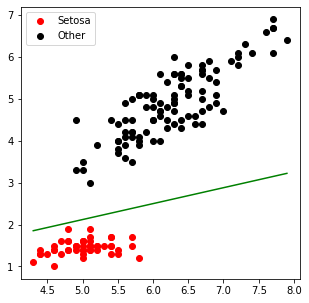

Epoch: [6/15], bias: 1.0, w1:1.7499999999999996, w2:-4.6000000000000005


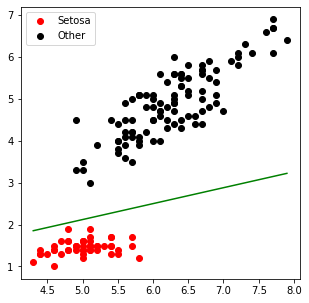

Epoch: [7/15], bias: 1.0, w1:1.7499999999999996, w2:-4.6000000000000005


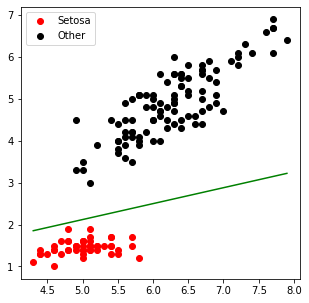

Epoch: [8/15], bias: 1.0, w1:1.7499999999999996, w2:-4.6000000000000005


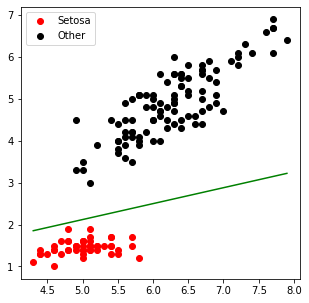

Epoch: [9/15], bias: 1.0, w1:1.7499999999999996, w2:-4.6000000000000005


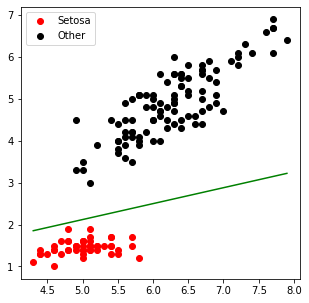

Epoch: [10/15], bias: 1.0, w1:1.7499999999999996, w2:-4.6000000000000005


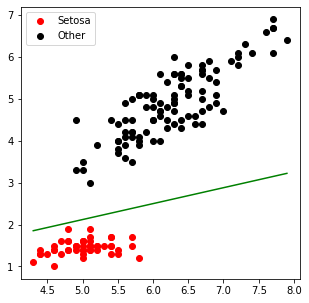

Epoch: [11/15], bias: 1.0, w1:1.7499999999999996, w2:-4.6000000000000005


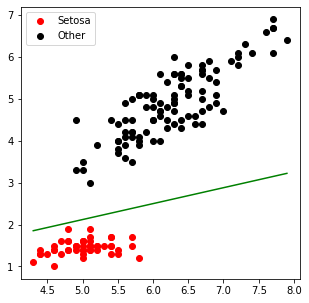

Epoch: [12/15], bias: 1.0, w1:1.7499999999999996, w2:-4.6000000000000005


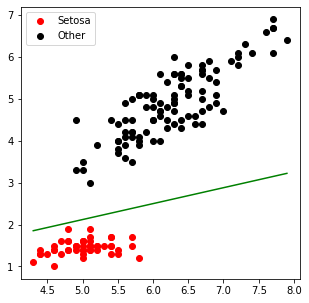

Epoch: [13/15], bias: 1.0, w1:1.7499999999999996, w2:-4.6000000000000005


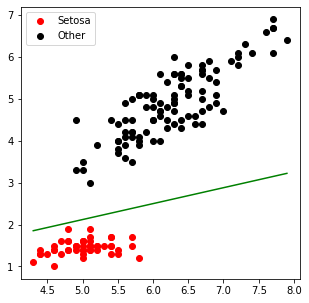

Epoch: [14/15], bias: 1.0, w1:1.7499999999999996, w2:-4.6000000000000005


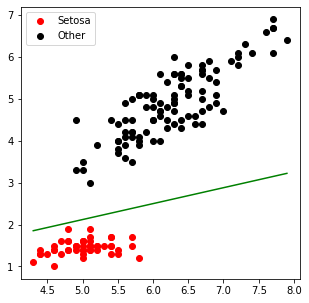

Epoch: [15/15], bias: 1.0, w1:1.7499999999999996, w2:-4.6000000000000005


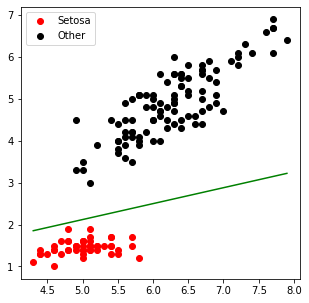

In [50]:
#--- Perceptron

#Inicializamos pesos en 0
b,w_1,w_2=0,0,0

#Numero de épocas y tasa de aprendizaje
n_epochs=15
n=0.5

#Entrenamos el perceptron
for epoch in range(n_epochs):
  for i,j,k in zip(SL,PL,C):
    z = i*w_1+j*w_2+b
    sig_z = act(z)

    #Classify
    if sig_z >= 0.5:
      out = 1
    elif sig_z < 0.5:
      out = 0

    #Delta -error func
    error = k-out

    #Update weights
    b = b+n*error
    w_1 = w_1 +n*error*i
    w_2 = w_2 +n*error*j

  print("Epoch: [{}/{}], bias: {}, w1:{}, w2:{}".format(epoch+1,n_epochs,b,w_1,w_2))
  #--- Plot input data
  fig = plt.figure(figsize=(5,5))
  plt.plot(SL[setosa],PL[setosa],'ro',label='Setosa')
  plt.plot(SL[other],PL[other],'ko',label='Other')
  plt.plot(np.sort(SL),y(np.sort(SL)),'-', c='green',)
  plt.legend()
  plt.show()
    

En la época 5 en adelante los pesos no cambian por lo que en ese punto ya se encontró una solución. El error es cero y por eso los pesos no cambian

In [55]:
#--- Accuracy

In [59]:
#--- Read data

data = pd.read_csv("/content/sample_data/iris.data",names=['sepal_length','sepal_width','petal_length','petal_width','class'])


X = data.drop(['class'], axis = 'columns')
Y = data['class']

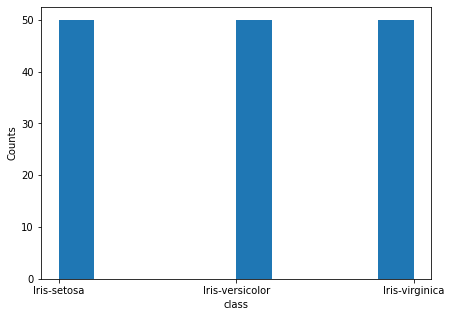

In [60]:
#--- Plot input data
fig = plt.figure(figsize=(7,5))
plt.hist(C)
plt.ylabel('Counts')
plt.xlabel('class')
plt.show()

In [102]:
#--- Divide dataset: train/test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

#--- Modelo 1 -- Capas:2, Neuronas[2,2]
model1 = MLPClassifier(activation='relu',  hidden_layer_sizes=(2, 2), solver='adam', learning_rate_init=0.1,random_state=3)
print('1: ',model1)

#--- Entrenamos el modelo y realizamos una predicción
model1.fit(X_train,Y_train)
Y_pred = model1.predict(X_test)
print(Y_pred)

#--- Evaluamos el modelo con el accuracy_score
acc = accuracy_score(Y_pred,Y_test)

print("Accuracy:{}".format(acc))

1:  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=3, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iri

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [104]:
#--- Divide dataset: train/test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

#--- Modelo 2 -- Capas:3, Neuronas[2,2,2]
model2 = MLPClassifier(activation='relu',  hidden_layer_sizes=(3, 4, 3), solver='adam', learning_rate_init=0.1,random_state=3)
print('2: ',model2)

#--- Entrenamos el modelo y realizamos una predicción
model2.fit(X_train,Y_train)
Y_pred = model2.predict(X_test)
print(Y_pred)

#--- Evaluamos el modelo con el accuracy_score
acc = accuracy_score(Y_pred,Y_test)

print("Accuracy:{}".format(acc))

2:  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 4, 3), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=3, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 